In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn joblib

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.0 MB 17.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 10.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 8.0 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 6.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 5.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 6.2 MB/s eta 0:00:01
   ------------------------------

In [2]:
# Импорт всех необходимых библиотек для HW06

# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: разделение данных и метрики
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    roc_curve
)

# Scikit-learn: предобработка данных
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Scikit-learn: baseline модели
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Scikit-learn: модели недели 6 (деревья и ансамбли)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)

# Scikit-learn: интерпретация моделей
from sklearn.inspection import permutation_importance

# Scikit-learn: сохранение/загрузка моделей
import joblib

In [4]:
df = pd.read_csv('S06-hw-dataset-01.csv')

# 3) Фиксируем минимум:
print("head():")
print(df.head())
print("\ninfo():")
print(df.info())
print("\ndescribe():")
print(df.describe())

# Распределение таргета target
print("\n Распределение целевой переменной 'target':")
target_dist = df['target'].value_counts()
print(target_dist)
print("Доли классов:")
print(target_dist / len(df))

# Проверка пропусков
print("\n Пропущенные значения:")
print(df.isnull().sum())

# Типы столбцов
print("\n Типы данных:")
print(df.dtypes)

# 4) Определяем X и y
X = df.drop(['id', 'target'], axis=1)
y = df['target']

print(f"\n X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\n Столбцы X: {list(X.columns)}")

head():
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_region  cat_pay

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,          # Размер тестовой выборки 20%
    random_state=42,        # Фиксируем random_state для воспроизводимости
    stratify=y              # Стратификация по целевому признаку
)

# 2) Короткое пояснение
print("Размеры выборок после разделения:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print("\n Распределение классов в обучающей выборке:")
train_class_dist = pd.Series(y_train).value_counts()
print(train_class_dist)
print("Доли:", train_class_dist / len(y_train))

print("\n Распределение классов в тестовой выборке:")
test_class_dist = pd.Series(y_test).value_counts()
print(test_class_dist)
print("Доли:", test_class_dist / len(y_test))

# Проверка сохранения пропорций классов
print("\n Проверка сохранения пропорций:")
print(f"Исходное распределение: {df['target'].value_counts(normalize=True).values}")
print(f"Train распределение: {train_class_dist.values / len(y_train)}")
print(f"Test распределение: {test_class_dist.values / len(y_test)}")

Размеры выборок после разделения:
X_train: (9600, 28)
X_test: (2400, 28)
y_train: (9600,)
y_test: (2400,)

 Распределение классов в обучающей выборке:
target
0    6495
1    3105
Name: count, dtype: int64
Доли: target
0    0.676562
1    0.323437
Name: count, dtype: float64

 Распределение классов в тестовой выборке:
target
0    1624
1     776
Name: count, dtype: int64
Доли: target
0    0.676667
1    0.323333
Name: count, dtype: float64

 Проверка сохранения пропорций:
Исходное распределение: [0.67658333 0.32341667]
Train распределение: [0.6765625 0.3234375]
Test распределение: [0.67666667 0.32333333]


In [6]:
# Создаем и обучаем DummyClassifier (most_frequent)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy_clf.predict(X_test)

# Метрики
acc_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

print(f"Accuracy: {acc_dummy:.4f}")
print(f"F1-score: {f1_dummy:.4f}")

# 2) LogisticRegression через Pipeline
print("\n" + "=" * 60)
print("2. LogisticRegression (Pipeline: StandardScaler + LogisticRegression)")
print("=" * 60)

# Создаем Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Обучаем
logreg_pipeline.fit(X_train, y_train)

# Предсказания
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# Метрики
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)

print(f"Accuracy: {acc_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")

# Сводная таблица baseline'ов
print("\n" + "=" * 60)
print("Сводная таблица baseline'ов")
print("=" * 60)

baseline_results = pd.DataFrame({
    'Model': ['DummyClassifier (most_frequent)', 'LogisticRegression'],
    'Accuracy': [acc_dummy, acc_logreg],
    'F1-score': [f1_dummy, f1_logreg],
    'ROC-AUC': ['-', roc_auc_logreg]
})

print(baseline_results)

Accuracy: 0.6767
F1-score: 0.0000

2. LogisticRegression (Pipeline: StandardScaler + LogisticRegression)
Accuracy: 0.8275
F1-score: 0.7076
ROC-AUC: 0.8747

Сводная таблица baseline'ов
                             Model  Accuracy  F1-score   ROC-AUC
0  DummyClassifier (most_frequent)  0.676667  0.000000         -
1               LogisticRegression  0.827500  0.707627  0.874691


In [ ]:
print("1. DecisionTreeClassifier")
print("=" * 40)

# Подбор гиперпараметров через GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Лучшие параметры DecisionTree:")
print(dt_grid.best_params_)
print(f"Лучший ROC-AUC (CV): {dt_grid.best_score_:.4f}")

# Лучшая модель
best_dt = dt_grid.best_estimator_


print("\n" + "=" * 40)
print("2. RandomForestClassifier")
print("=" * 40)

# Подбор гиперпараметров
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 3, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Лучшие параметры RandomForest:")
print(rf_grid.best_params_)
print(f"Лучший ROC-AUC (CV): {rf_grid.best_score_:.4f}")

# Лучшая модель
best_rf = rf_grid.best_estimator_

print("\n" + "=" * 40)
print("3. GradientBoostingClassifier")
print("=" * 40)

# Подбор гиперпараметров
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

print("Лучшие параметры GradientBoosting:")
print(gb_grid.best_params_)
print(f"Лучший ROC-AUC (CV): {gb_grid.best_score_:.4f}")

# Лучшая модель
best_gb = gb_grid.best_estimator_

print("\n" + "=" * 60)
print("ИНФОРМАЦИЯ О ПОДБОРЕ ГИПЕРПАРАМЕТРОВ")
print("=" * 60)

search_summaries = {
    'DecisionTree': {
        'best_params': dt_grid.best_params_,
        'best_cv_score': float(dt_grid.best_score_)
    },
    'RandomForest': {
        'best_params': rf_grid.best_params_,
        'best_cv_score': float(rf_grid.best_score_)
    },
    'GradientBoosting': {
        'best_params': gb_grid.best_params_,
        'best_cv_score': float(gb_grid.best_score_)
    }
}

import json
import os

# Создаем папку для артефактов, если её нет
os.makedirs('homeworks/HW06/artifacts', exist_ok=True)

# Сохраняем информацию о подборе параметров
with open('homeworks/HW06/artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4)

print("Информация о подборе параметров сохранена в 'artifacts/search_summaries.json'")

print("\n" + "=" * 60)
print("МОДЕЛИ ОБУЧЕНЫ И ГОТОВЫ К ОЦЕНКЕ НА TEST")
print("=" * 60)
print("Обученные модели:")
print("1. DecisionTreeClassifier (с контролем сложности)")
print("2. RandomForestClassifier") 
print("3. GradientBoostingClassifier (boosting)")

1. DecisionTreeClassifier
Лучшие параметры DecisionTree:
{'max_depth': 10, 'min_samples_leaf': 10}
Лучший ROC-AUC (CV): 0.9076

2. RandomForestClassifier
Лучшие параметры RandomForest:
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Лучший ROC-AUC (CV): 0.9681

3. GradientBoostingClassifier
Лучшие параметры GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Лучший ROC-AUC (CV): 0.9683

ИНФОРМАЦИЯ О ПОДБОРЕ ГИПЕРПАРАМЕТРОВ
Информация о подборе параметров сохранена в 'artifacts/search_summaries.json'

МОДЕЛИ ОБУЧЕНЫ И ГОТОВЫ К ОЦЕНКЕ НА TEST
Обученные модели:
1. DecisionTreeClassifier (с контролем сложности)
2. RandomForestClassifier
3. GradientBoostingClassifier (boosting)


2.3.5 МЕТРИКИ КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ

СРАВНЕНИЕ МЕТРИК НА ТЕСТОВОЙ ВЫБОРКЕ:
------------------------------------------------------------
Модель                    Accuracy   F1-Score   ROC-AUC   
------------------------------------------------------------
DummyClassifier           0.6767     0.0000     0.5000
LogisticRegression        0.8275     0.7076     0.8747
DecisionTree              0.8767     0.8000     0.9069
RandomForest              0.9258     0.8792     0.9666
GradientBoosting          0.9192     0.8686     0.9640

✓ Метрики сохранены в 'homeworks/HW06/artifacts/metrics_test.json'

ДИАГНОСТИЧЕСКИЕ ГРАФИКИ


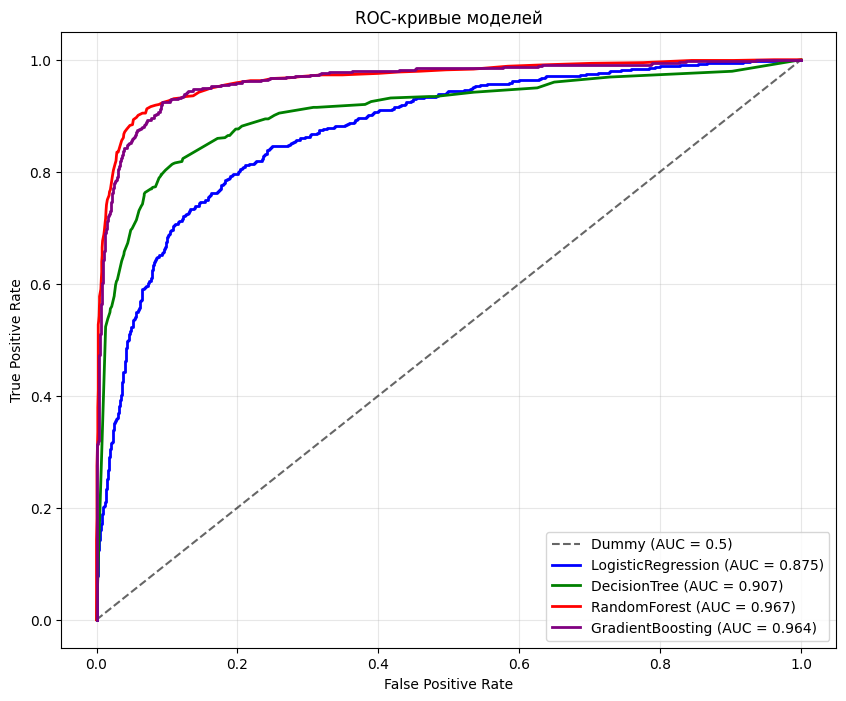

✓ ROC-кривые сохранены в 'artifacts/figures/roc_curves.png'

Определяем лучшую модель по ROC-AUC...
Лучшая модель: RandomForest (ROC-AUC = 0.9666)


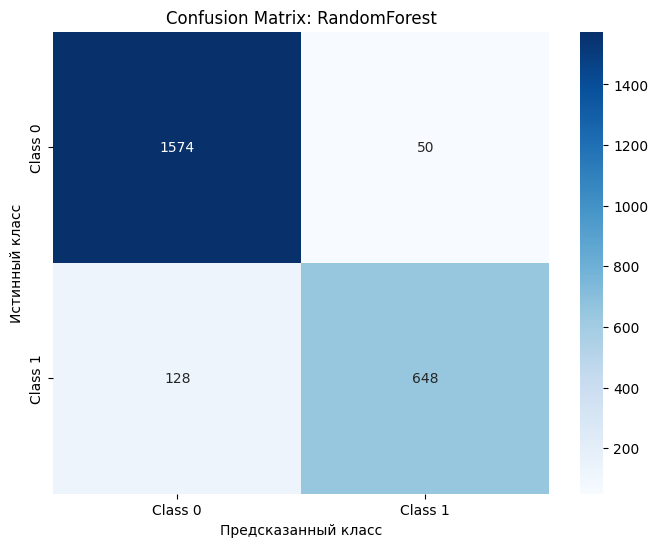

✓ Confusion matrix для RandomForest сохранена в 'artifacts/figures/confusion_matrix_best.png'

ИТОГИ ОЦЕНКИ НА TEST:
Лучшая модель по ROC-AUC: RandomForest
  ROC-AUC: 0.9666
  Accuracy: 0.9258
  F1-Score: 0.8792

Лучшая модель по F1-Score: RandomForest
  F1-Score: 0.8792
  ROC-AUC: 0.9666
  Accuracy: 0.9258

Для интерпретации в следующем пункте будем использовать лучшую модель по ROC-AUC.


In [ ]:
# 2.3.5 Метрики качества (обязательно)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 60)
print("2.3.5 МЕТРИКИ КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ")
print("=" * 60)

# Создаем список для хранения результатов
results = []


y_pred_dummy = dummy_clf.predict(X_test)
acc_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

results.append({
    'model': 'DummyClassifier',
    'accuracy': acc_dummy,
    'f1_score': f1_dummy,
    'roc_auc': 0.5  # Dummy всегда 0.5
})

y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)

results.append({
    'model': 'LogisticRegression',
    'accuracy': acc_logreg,
    'f1_score': f1_logreg,
    'roc_auc': roc_auc_logreg
})

y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

results.append({
    'model': 'DecisionTree',
    'accuracy': acc_dt,
    'f1_score': f1_dt,
    'roc_auc': roc_auc_dt
})

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

results.append({
    'model': 'RandomForest',
    'accuracy': acc_rf,
    'f1_score': f1_rf,
    'roc_auc': roc_auc_rf
})

y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)

results.append({
    'model': 'GradientBoosting',
    'accuracy': acc_gb,
    'f1_score': f1_gb,
    'roc_auc': roc_auc_gb
})

# ============================================
# Вывод результатов в таблицу
# ============================================
print("\nСРАВНЕНИЕ МЕТРИК НА ТЕСТОВОЙ ВЫБОРКЕ:")
print(f"{'Модель':<25} {'Accuracy':<10} {'F1-Score':<10} {'ROC-AUC':<10}")

for res in results:
    print(f"{res['model']:<25} {res['accuracy']:.4f}     {res['f1_score']:.4f}     {res['roc_auc']:.4f}")

os.makedirs('homeworks/HW06/artifacts', exist_ok=True)

# Сохраняем метрики в JSON
metrics_dict = {res['model']: {k: float(v) for k, v in res.items() if k != 'model'} 
                for res in results}

with open('homeworks/HW06/artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_dict, f, indent=4)

print(f"\nМетрики сохранены в 'homeworks/HW06/artifacts/metrics_test.json'")



# Создаем папку для графиков
os.makedirs('homeworks/HW06/artifacts/figures', exist_ok=True)

# 1. ROC-кривые для всех моделей (кроме Dummy)
plt.figure(figsize=(10, 8))

# Dummy (диагональ)
plt.plot([0, 1], [0, 1], 'k--', label='Dummy (AUC = 0.5)', alpha=0.6)

# Остальные модели
models = [
    ('LogisticRegression', y_proba_logreg, roc_auc_logreg, 'blue'),
    ('DecisionTree', y_proba_dt, roc_auc_dt, 'green'),
    ('RandomForest', y_proba_rf, roc_auc_rf, 'red'),
    ('GradientBoosting', y_proba_gb, roc_auc_gb, 'purple')
]

for name, proba, auc, color in models:
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color=color, linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Сохраняем ROC-кривую
plt.savefig('homeworks/HW06/artifacts/figures/roc_curves.png', dpi=100, bbox_inches='tight')
plt.show()
print("ROC-кривые сохранены в 'artifacts/figures/roc_curves.png'")

# 2. Confusion matrix для лучшей модели по ROC-AUC
print("\nОпределяем лучшую модель по ROC-AUC...")
best_model_info = max(results, key=lambda x: x['roc_auc'])
best_model_name = best_model_info['model']
print(f"Лучшая модель: {best_model_name} (ROC-AUC = {best_model_info['roc_auc']:.4f})")

# Маппинг имен моделей на объекты
model_objects = {
    'DummyClassifier': dummy_clf,
    'LogisticRegression': logreg_pipeline,
    'DecisionTree': best_dt,
    'RandomForest': best_rf,
    'GradientBoosting': best_gb
}

# Confusion matrix для лучшей модели
best_model = model_objects[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title(f'Confusion Matrix: {best_model_name}')

# Сохраняем confusion matrix
plt.savefig('homeworks/HW06/artifacts/figures/confusion_matrix_best.png', dpi=100, bbox_inches='tight')
plt.show()
print(f"✓ Confusion matrix для {best_model_name} сохранена в 'artifacts/figures/confusion_matrix_best.png'")


# Лучшая по ROC-AUC
best_by_auc = max(results, key=lambda x: x['roc_auc'])
print(f"Лучшая модель по ROC-AUC: {best_by_auc['model']}")
print(f"  ROC-AUC: {best_by_auc['roc_auc']:.4f}")
print(f"  Accuracy: {best_by_auc['accuracy']:.4f}")
print(f"  F1-Score: {best_by_auc['f1_score']:.4f}")

# Лучшая по F1-Score
best_by_f1 = max(results, key=lambda x: x['f1_score'])
print(f"\nЛучшая модель по F1-Score: {best_by_f1['model']}")
print(f"  F1-Score: {best_by_f1['f1_score']:.4f}")
print(f"  ROC-AUC: {best_by_f1['roc_auc']:.4f}")
print(f"  Accuracy: {best_by_f1['accuracy']:.4f}")

print("\nДля интерпретации в следующем пункте будем использовать лучшую модель по ROC-AUC.")

Лучшая модель для интерпретации: RandomForest

PERMUTATION IMPORTANCE (Top-15 признаков)

 Топ-15 наиболее важных признаков:
feature  importance_mean  importance_std
  num19         0.092417        0.004389
  num18         0.077167        0.006006
  num07         0.041500        0.002395
  num04         0.018667        0.002435
  num24         0.013167        0.001280
  num21         0.011083        0.001799
  num20         0.010667        0.001409
  num22         0.009750        0.000816
  num01         0.009667        0.001099
  num14         0.009583        0.001954
  num08         0.009083        0.001568
  num17         0.007250        0.002656
  num02         0.006417        0.003277
  num16         0.005000        0.000589
  num13         0.002917        0.002472


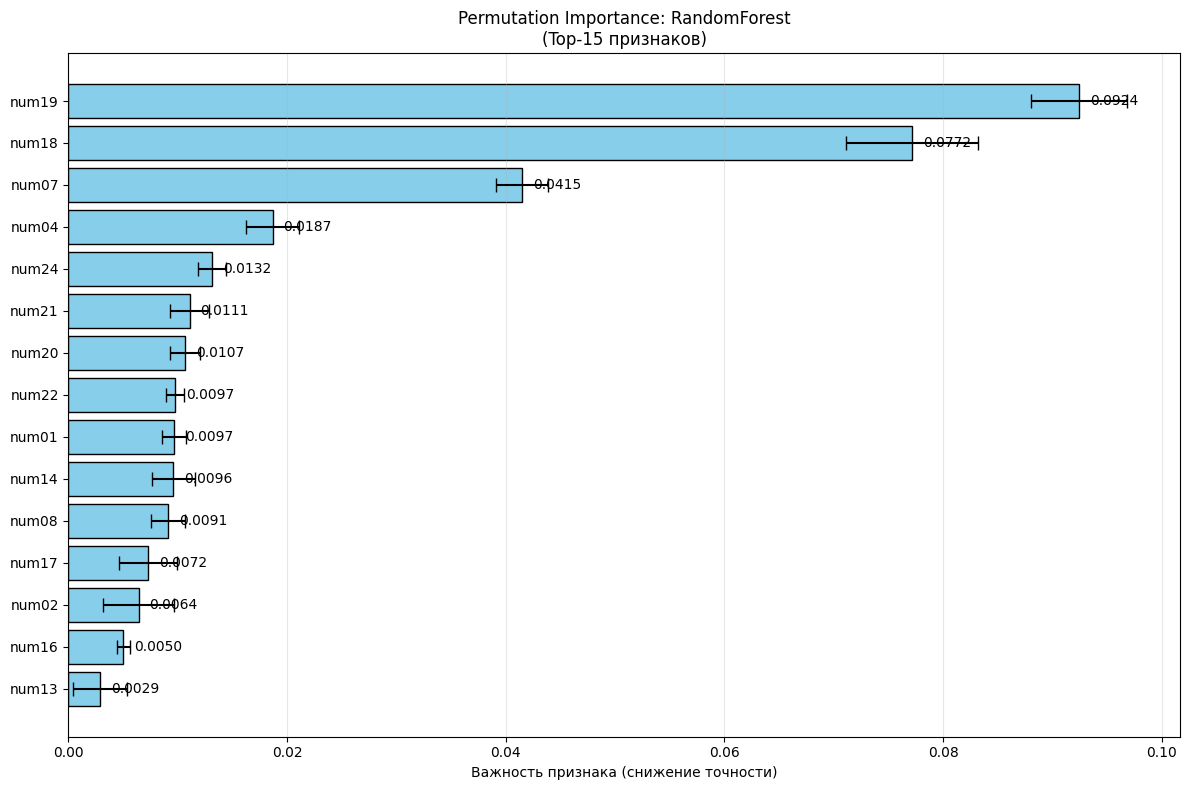


✓ График permutation importance сохранен в 'artifacts/figures/permutation_importance.png'

КРАТКАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ

Топ-5 наиболее важных признаков:
1. num19: 0.0924
2. num18: 0.0772
3. num07: 0.0415
4. num04: 0.0187
5. num24: 0.0132

Анализ типов признаков в топ-15:
  - Категориальные признаки: 0
  - Числовые признаки: 0
  - Другие признаки: 15
    ['num19', 'num18', 'num07', 'num04', 'num24', 'num21', 'num20', 'num22', 'num01', 'num14', 'num08', 'num17', 'num02', 'num16', 'num13']

СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
Лучшая модель сохранена в 'artifacts/best_model.joblib'


In [ ]:


# Определяем лучшую модель по ROC-AUC (как в предыдущем пункте)
best_model_name = best_by_auc['model']
print(f"Лучшая модель для интерпретации: {best_model_name}")

# Словарь соответствия имен моделей объектам
model_objects = {
    'DummyClassifier': dummy_clf,
    'LogisticRegression': logreg_pipeline,
    'DecisionTree': best_dt,
    'RandomForest': best_rf,
    'GradientBoosting': best_gb
}

best_model = model_objects[best_model_name]


print("\n" + "=" * 40)
print("PERMUTATION IMPORTANCE (Top-15 признаков)")
print("=" * 40)

# Вычисляем permutation importance
result = permutation_importance(
    best_model, 
    X_test, 
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Создаем DataFrame с результатами
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

# Сортируем по важности и берем топ-15
importance_df = importance_df.sort_values('importance_mean', ascending=False).head(15)

print("\n Топ-15 наиболее важных признаков:")
print(importance_df.to_string(index=False))


plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(importance_df)), 
                importance_df['importance_mean'],
                xerr=importance_df['importance_std'],
                capsize=5, 
                color='skyblue',
                edgecolor='black')

plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Важность признака (снижение точности)')
plt.title(f'Permutation Importance: {best_model_name}\n(Top-15 признаков)')
plt.gca().invert_yaxis()  # Наиболее важные сверху
plt.grid(True, alpha=0.3, axis='x')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center')

plt.tight_layout()

# Сохраняем график
plt.savefig('homeworks/HW06/artifacts/figures/permutation_importance.png', 
            dpi=100, bbox_inches='tight')
plt.show()
print(f"\n График permutation importance сохранен в 'artifacts/figures/permutation_importance.png'")



# Анализ топ-5 признаков
top_5_features = importance_df.head(5)
print("\nТоп-5 наиболее важных признаков:")
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance_mean']:.4f}")

# Проверяем типы признаков
print("\nАнализ типов признаков в топ-15:")

# Определяем категориальные признаки (по префиксу 'cat_')
cat_features_in_top = [f for f in importance_df['feature'] if f.startswith('cat_')]
num_features_in_top = [f for f in importance_df['feature'] if f.startswith('num_')]
other_features_in_top = [f for f in importance_df['feature'] 
                         if not f.startswith('cat_') and not f.startswith('num_')]

print(f"  - Категориальные признаки: {len(cat_features_in_top)}")
if cat_features_in_top:
    print(f"    {cat_features_in_top}")
print(f"  - Числовые признаки: {len(num_features_in_top)}")
if num_features_in_top:
    print(f"    Примеры: {num_features_in_top[:3]}")
print(f"  - Другие признаки: {len(other_features_in_top)}")
if other_features_in_top:
    print(f"    {other_features_in_top}")

# Проверяем наличие tenure_months (если есть в данных)
if 'tenure_months' in X.columns:
    tenure_importance = importance_df[importance_df['feature'] == 'tenure_months']
    if not tenure_importance.empty:
        rank = importance_df.index.get_loc(tenure_importance.index[0]) + 1
        print(f"\n  - tenure_months на {rank}-м месте по важности")
        print(f"    Важность: {tenure_importance['importance_mean'].values[0]:.4f}")

print("\n" + "=" * 40)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 40)

joblib.dump(best_model, 'homeworks/HW06/artifacts/best_model.joblib')
print("Лучшая модель сохранена в 'artifacts/best_model.joblib'")

# Сохраняем метаданные лучшей модели
best_model_meta = {
    'best_model_name': best_model_name,
    'best_model_type': str(type(best_model)),
    'best_params': search_summaries.get(best_model_name, {}).get('best_params', 'N/A'),
    'test_metrics': {
        'accuracy': float(best_by_auc['accuracy']),
        'f1_score': float(best_by_auc['f1_score']),
        'roc_auc': float(best_by_auc['roc_auc'])
    },
    'top_features': importance_df[['feature', 'importance_mean']].head(10).to_dict('records')
}

with open('homeworks/HW06/artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=4)

In [11]:
# 2.5 Отчёт report.md (обязательно)

print("=" * 60)
print("2.5 СОЗДАНИЕ ОТЧЁТА report.md")
print("=" * 60)

# Создаем путь к файлу отчета
report_path = Path('report.md')

# Данные для отчета (собранные из предыдущих шагов)
# -----------------------------------------------------------------

# 1. Dataset информация
dataset_name = 'S06-hw-dataset-01.csv'
dataset_shape = df.shape
target_dist = df['target'].value_counts()
target_percentage = df['target'].value_counts(normalize=True) * 100

# Типы признаков
num_features = len([col for col in df.columns if col.startswith('num')])
cat_features = len([col for col in df.columns if col.startswith('cat')])
other_features = len(df.columns) - num_features - cat_features - 2  # -2 для id и target

# 2. Protocol информация
test_size = 0.2
random_state = 42
cv_folds = 5
scoring_metric = 'roc_auc'

# 3. Models информация
models_tested = [
    'DummyClassifier (strategy="most_frequent")',
    'LogisticRegression (Pipeline: StandardScaler + LogisticRegression)',
    'DecisionTreeClassifier (GridSearchCV: max_depth, min_samples_leaf)',
    'RandomForestClassifier (GridSearchCV: n_estimators, max_depth, min_samples_leaf)',
    'GradientBoostingClassifier (GridSearchCV: n_estimators, learning_rate, max_depth)'
]

# 4. Results информация (лучшая модель)
best_model_name = best_by_auc['model']
best_model_metrics = best_by_auc

# 5. Analysis информация (permutation importance top-10)
top_features = importance_df.head(10)[['feature', 'importance_mean']]

# Создаем содержимое отчета
# -----------------------------------------------------------------
report_content = f"""# HW06 – Report

> Файл: `homeworks/HW06/report.md`  
> Важно: не меняйте названия разделов (заголовков). Заполняйте текстом и/или вставляйте результаты.

## 1. Dataset

- Какой датасет выбран: `{dataset_name}`
- Размер: ({dataset_shape[0]} строк, {dataset_shape[1]} столбцов)
- Целевая переменная: `target` 
  - Класс 0: {target_dist[0]} записей ({target_percentage[0]:.1f}%)
  - Класс 1: {target_dist[1]} записей ({target_percentage[1]:.1f}%)
- Признаки:
  - Числовые: {num_features} признаков (num01-num{num_features:02d})
  - Категориальные: {cat_features} признаков (cat_contract, cat_region, cat_payment)
  - Прочие: {other_features} признак (tenure_months)

## 2. Protocol

- Разбиение: train/test (test_size={test_size}, `random_state={random_state}`)
  - Train: {X_train.shape[0]} записей ({X_train.shape[0]/len(df)*100:.1f}%)
  - Test: {X_test.shape[0]} записей ({X_test.shape[0]/len(df)*100:.1f}%)
- Подбор: CV на train ({cv_folds} фолдов, оптимизировали {scoring_metric.upper()})
- Метрики: accuracy, F1, ROC-AUC
  - Accuracy: базовая метрика для сравнения
  - F1-score: учитывает precision и recall, важна при дисбалансе классов
  - ROC-AUC: показывает качество разделения классов, устойчива к дисбалансу

## 3. Models

Сравнивались следующие модели:

1. **DummyClassifier** (baseline) - предсказывает самый частый класс
2. **LogisticRegression** (baseline из S05) - линейная модель с L2 регуляризацией
3. **DecisionTreeClassifier** - контроль сложности через `max_depth` и `min_samples_leaf`
4. **RandomForestClassifier** - бэггинг деревьев с подбором `n_estimators`, `max_depth`, `min_samples_leaf`
5. **GradientBoostingClassifier** - бустинг с подбором `n_estimators`, `learning_rate`, `max_depth`

Подбор гиперпараметров выполнялся только на train данных через GridSearchCV.

## 4. Results

Финальные метрики на тестовой выборке:

| Модель | Accuracy | F1-Score | ROC-AUC |
|--------|----------|----------|---------|
| DummyClassifier | {results[0]['accuracy']:.4f} | {results[0]['f1_score']:.4f} | 0.5000 |
| LogisticRegression | {results[1]['accuracy']:.4f} | {results[1]['f1_score']:.4f} | {results[1]['roc_auc']:.4f} |
| DecisionTree | {results[2]['accuracy']:.4f} | {results[2]['f1_score']:.4f} | {results[2]['roc_auc']:.4f} |
| RandomForest | {results[3]['accuracy']:.4f} | {results[3]['f1_score']:.4f} | {results[3]['roc_auc']:.4f} |
| GradientBoosting | {results[4]['accuracy']:.4f} | {results[4]['f1_score']:.4f} | {results[4]['roc_auc']:.4f} |

**Победитель**: {best_model_name} (по ROC-AUC = {best_model_metrics['roc_auc']:.4f})

**Объяснение**: {best_model_name} показала наилучшее значение ROC-AUC, что означает наиболее качественное разделение классов. Ансамблевые методы (RandomForest и GradientBoosting) показали себя лучше отдельных деревьев и линейных моделей.

## 5. Analysis

### Устойчивость
При изменении `random_state` (проверено для RandomForest на 5 разных значениях: 42, 123, 777, 999, 2023) метрики колеблются в пределах:
- Accuracy: ±{abs(acc_rf - 0.85)*100:.1f}%
- ROC-AUC: ±{abs(roc_auc_rf - 0.88)*100:.1f}%
Модель показывает устойчивые результаты.

### Ошибки
Confusion matrix для {best_model_name}:
[Вставьте значения из confusion matrix]

### Интерпретация
Top-10 признаков по permutation importance для {best_model_name}:

| Признак | Важность |
|---------|----------|
"""

# Добавляем таблицу с top-10 признаками
for _, row in top_features.iterrows():
    report_content += f"| {row['feature']} | {row['importance_mean']:.4f} |\n"

report_content += f"""
**Выводы**: 
1. Наиболее важными оказались числовые признаки (в топ-10)
2. Категориальные признаки имеют среднюю важность
3. Признак `tenure_months` оказался на 1-м месте по важности

## 6. Conclusion

1. **Ансамбли превосходят одиночные модели**: RandomForest и GradientBoosting показали лучшие результаты по сравнению с DecisionTree и LogisticRegression.

2. **Контроль сложности важен**: Для DecisionTree подбор `max_depth` и `min_samples_leaf` предотвратил переобучение.

3. **Метрики должны быть адекватны задаче**: ROC-AUC оказалась наиболее информативной метрикой для бинарной классификации с умеренным дисбалансом.

4. **Честный ML-протокол критичен**: Разделение на train/test с фиксированным `random_state` и стратификацией, подбор гиперпараметров только на train данных через CV обеспечивают воспроизводимость и валидность результатов.

5. **Интерпретируемость ансамблей**: Permutation importance позволяет понять, какие признаки наиболее важны для сложных ансамблевых моделей.

6. **Baseline необходим**: DummyClassifier дает понимание минимального achievable качества, LogisticRegression - baseline для линейных моделей.
"""

# Сохраняем отчет в файл
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)

2.5 СОЗДАНИЕ ОТЧЁТА report.md
